## This notebook is used to clean the data collected from the experiment

**File Names:** `Demo_df` and `Final_df`

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:
## Read Data
demo_df = pd.read_csv('data/Demo_df.csv')
df = pd.read_csv('data/Final_df.csv')

In [18]:
df.head()

,Duration (in seconds),What is your age?,What is your gender?,LD1,LD2,LD3,LD4,LD5,TE1,TE2,...,PV2.15,PV3.15,BD1.15,BD2.15,BD3.15,Which type of conversation felt more natural to you?,Which type of conversation would you prefer to listen to in real life?,Which conversation type seemed more engaging to you?,Why did you choose your preferences in Q1-4,Why would you prefer listening to human-hosted or AI-generated podcasts?
0,788,56,Male,Occasionally,Moderate (11-15 words),NaN,Moderate,Moderate,Positive,Neutral,...,NaN,NaN,NaN,NaN,NaN,Both,AI-host podcast,AI-AI,The conversations between the AI hosts were ve...,"Until this study, I didn?? know that AI hosts ..."
1,668,30,Non-binary,Often,Short (6-10 words),Few,A little varied,Simple,Very positive,Calm,...,NaN,NaN,NaN,NaN,NaN,AI-AI,Human-host podcast,Human-Human,"The AI podcasts seemed to be more artificial, ...",I want to support human content creators
2,696,24,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Human-Human,Human-host podcast,Human-Human,They felt more like a conversation I could env...,Human hosted podcasts are genuine human though...
3,1317,63,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Never,Somewhat varied,Somewhat smooth,Short (3-5 seconds),Somewhat fragmented,Human-Human,Human-host podcast,Human-Human,The human audio examples were not conversation...,Human hosted because it is more genuine than a...
4,664,25,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Human-Human,AI-host podcast,Both,I chose Both because each type of conversation...,I would prefer both depending on the purpose. ...


## Rename and remove the incomplete data

In [20]:
#copy the dataframe to avoid modifying the original
df_cleaned = df.copy()

# remove unnecessary columns
df_cleaned = df_cleaned.dropna(axis=1, how='all')

rename_map = {
    'Duration (in seconds)': 'duration_sec',
    'What is your age?': 'age',
    'What is your gender?': 'gender',
    'Which type of conversation felt more natural to you?': 'natural_preference',
    'Which type of conversation would you prefer to listen to in real life?': 'host_preference',
    'Which conversation type seemed more engaging to you?': 'engagement_preference',
    'Why did you choose your preferences in Q1-4': 'preference_reason',
    'Why would you prefer listening to human-hosted or AI-generated podcasts?': 'host_reason'
}
df_cleaned.rename(columns=rename_map, inplace=True)

df_cleaned['duration_sec'] = pd.to_numeric(df_cleaned['duration_sec'], errors='coerce')
df_cleaned['age'] = pd.to_numeric(df_cleaned['age'], errors='coerce')

df_cleaned = df_cleaned[df_cleaned['duration_sec'] < 10800]

df_cleaned[['duration_sec', 'age', 'gender', 'natural_preference',
            'host_preference', 'engagement_preference', 
            'preference_reason', 'host_reason']].head()


,duration_sec,age,gender,natural_preference,host_preference,engagement_preference,preference_reason,host_reason
0,788,56,Male,Both,AI-host podcast,AI-AI,The conversations between the AI hosts were ve...,"Until this study, I didn?? know that AI hosts ..."
1,668,30,Non-binary,AI-AI,Human-host podcast,Human-Human,"The AI podcasts seemed to be more artificial, ...",I want to support human content creators
2,696,24,Male,Human-Human,Human-host podcast,Human-Human,They felt more like a conversation I could env...,Human hosted podcasts are genuine human though...
3,1317,63,Male,Human-Human,Human-host podcast,Human-Human,The human audio examples were not conversation...,Human hosted because it is more genuine than a...
4,664,25,Female,Human-Human,AI-host podcast,Both,I chose Both because each type of conversation...,I would prefer both depending on the purpose. ...


In [21]:
#export cleaned data
df_cleaned.to_csv('data/cleaned_data.csv', index=False)

## Aspect Analysis

In [37]:
df_whole = pd.read_csv('data/whole_df.csv')
df_whole.head()

,id,duration_sec,age,gender,LD1,LD2,LD3,LD4,LD5,TE1,...,PV2.5,PV3.5,BD1.5,BD2.5,BD3.5,natural_preference,host_preference,engagement_preference,preference_reason,host_reason
0,1,788,56,Male,3,3,2,3,3,4,...,1,4,5.0,3,5,Both,AI-host podcast,AI-AI,The conversations between the AI hosts were 4 ...,"Until this study, I didn?? know that AI hosts ..."
1,2,668,30,Non-binary,4,2,2,2,2,5,...,1,3,5.0,2,5,AI-AI,Human-host podcast,Human-Human,"The AI podcasts seemed to be more artificial, ...",I want to support human content creators
2,3,696,24,Male,2,3,2,3,2,4,...,2,3,2.0,1,3,Human-Human,Human-host podcast,Human-Human,They felt more like a conversation I could env...,Human hosted podcasts are genuine human though...
3,4,1317,63,Male,1,3,3,3,3,4,...,1,4,4.0,2,2,Human-Human,Human-host podcast,Human-Human,The human audio examples were not conversation...,Human hosted because it is more genuine than a...
4,5,664,25,Female,5,2,2,5,1,5,...,2,5,5.0,2,5,Human-Human,AI-host podcast,Both,I chose Both because each type of conversation...,I would prefer both depending on the purpose. ...


In [ ]:
prefix_groups = {
    "LD": [col for col in df_whole.columns if col.startswith("LD")],
    "TE": [col for col in df_whole.columns if col.startswith("TE")],
    "PV": [col for col in df_whole.columns if col.startswith("PV")],
    "BD": [col for col in df_whole.columns if col.startswith("BD")]
}

analysis_summary = {}
for prefix, cols in prefix_groups.items():
    df_subset = df_whole[cols]
    row_mean = df_subset.mean(axis=1, skipna=True)
    analysis_summary[f"{prefix}_mean"] = row_mean

for key, series in analysis_summary.items():
    df_whole[key] = series

df_whole[['LD_mean', 'TE_mean', 'PV_mean', 'BD_mean']].head()

,LD_mean,TE_mean,PV_mean,BD_mean
0,3.724138,4.366667,2.944444,4.000000
1,2.733333,3.933333,2.500000,3.000000
2,2.300000,3.100000,2.888889,2.611111
3,2.733333,3.600000,3.000000,2.555556
4,2.833333,4.733333,3.611111,3.722222


In [ ]:

exposure_levels = [''] + [f'.{i}' for i in range(1, 6)]

def compute_exposure_means(prefix: str, dimension_count: int = 5):
    exposure_means = {}
    for i, suffix in enumerate(exposure_levels):
        cols = [f"{prefix}{j}{suffix}" for j in range(1, dimension_count + 1)]
        valid_cols = [col for col in cols if col in df_whole.columns]
        exposure_means[f"{prefix}_exposure_mean_{i}"] = df_whole[valid_cols].mean(axis=1, skipna=True)
    return exposure_means

# 执行计算
ld_means = compute_exposure_means('LD')
te_means = compute_exposure_means('TE')
pv_means = compute_exposure_means('PV')
bd_means = compute_exposure_means('BD')

# 写入 df_whole 中
for d in [te_means, pv_means, bd_means]:
    for key, series in d.items():
        df_whole[key] = series

# 展示所有 TE/PV/BD exposure mean 的前几行
exposure_mean_cols_ld = list(ld_means.keys())
exposure_mean_cols_te = list(te_means.keys())
exposure_mean_cols_pv = list(pv_means.keys())
exposure_mean_cols_bd = list(bd_means.keys())

df_whole[exposure_mean_cols_ld + exposure_mean_cols_te + exposure_mean_cols_pv + exposure_mean_cols_bd].head()


,LD_exposure_mean_0,LD_exposure_mean_1,LD_exposure_mean_2,LD_exposure_mean_3,LD_exposure_mean_4,LD_exposure_mean_5,TE_exposure_mean_0,TE_exposure_mean_1,TE_exposure_mean_2,TE_exposure_mean_3,...,PV_exposure_mean_2,PV_exposure_mean_3,PV_exposure_mean_4,PV_exposure_mean_5,BD_exposure_mean_0,BD_exposure_mean_1,BD_exposure_mean_2,BD_exposure_mean_3,BD_exposure_mean_4,BD_exposure_mean_5
0,2.8,4.2,3.8,4.0,3.5,4.0,3.8,4.8,4.0,5.0,...,3.333333,2.666667,3.000000,2.666667,3.666667,4.666667,3.333333,4.666667,3.333333,4.333333
1,2.4,2.0,2.8,2.6,3.6,3.0,4.2,3.6,3.8,4.0,...,2.333333,2.666667,3.333333,2.333333,2.333333,2.000000,3.000000,4.000000,2.666667,4.000000
2,2.4,2.6,2.4,1.6,2.4,2.4,3.4,2.6,4.0,2.0,...,2.666667,3.333333,2.666667,3.000000,3.333333,2.666667,4.000000,1.333333,2.333333,2.000000
3,2.6,2.2,2.6,2.6,3.4,3.0,3.8,3.4,3.8,3.8,...,3.333333,3.000000,2.666667,3.000000,3.000000,1.666667,3.000000,2.000000,3.000000,2.666667
4,3.0,2.8,3.4,2.6,2.6,2.6,4.4,5.0,4.8,4.6,...,3.333333,4.000000,2.666667,3.333333,3.333333,4.000000,4.000000,3.666667,3.333333,4.000000


In [42]:
df_whole

,id,duration_sec,age,gender,LD1,LD2,LD3,LD4,LD5,TE1,...,PV_exposure_mean_2,PV_exposure_mean_3,PV_exposure_mean_4,PV_exposure_mean_5,BD_exposure_mean_0,BD_exposure_mean_1,BD_exposure_mean_2,BD_exposure_mean_3,BD_exposure_mean_4,BD_exposure_mean_5
0,1,788,56,Male,3,3,2,3,3,4,...,3.333333,2.666667,3.000000,2.666667,3.666667,4.666667,3.333333,4.666667,3.333333,4.333333
1,2,668,30,Non-binary,4,2,2,2,2,5,...,2.333333,2.666667,3.333333,2.333333,2.333333,2.000000,3.000000,4.000000,2.666667,4.000000
2,3,696,24,Male,2,3,2,3,2,4,...,2.666667,3.333333,2.666667,3.000000,3.333333,2.666667,4.000000,1.333333,2.333333,2.000000
3,4,1317,63,Male,1,3,3,3,3,4,...,3.333333,3.000000,2.666667,3.000000,3.000000,1.666667,3.000000,2.000000,3.000000,2.666667
4,5,664,25,Female,5,2,2,5,1,5,...,3.333333,4.000000,2.666667,3.333333,3.333333,4.000000,4.000000,3.666667,3.333333,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,66,3919,28,Male,1,3,2,3,3,5,...,2.666667,2.666667,2.666667,2.333333,5.000000,2.666667,4.666667,4.000000,4.666667,4.333333
66,67,4165,40,Female,2,4,3,3,3,4,...,2.333333,2.333333,2.333333,2.333333,4.333333,3.666667,3.333333,3.000000,4.000000,3.000000
67,68,4221,81,Male,4,5,3,2,3,2,...,2.666667,3.333333,2.333333,3.000000,1.000000,3.000000,4.333333,2.000000,1.333333,2.333333
68,69,1339,40,Female,3,4,2,3,3,4,...,3.000000,3.333333,2.333333,3.666667,4.333333,2.000000,3.000000,3.666667,3.666667,4.000000


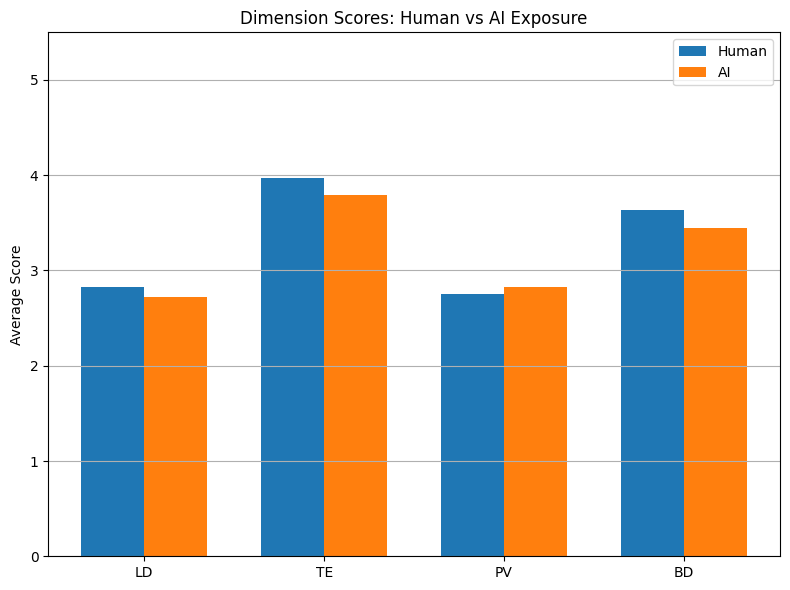

In [44]:
# STEP: 提取 AI 和 Human 对应 exposure 轮次
human_indices = [0, 2, 4]
ai_indices = [1, 3, 5]

# 分别计算各维度在 AI 和 Human exposure 中的均值（横向取平均）
ld_mean_human = np.mean([ld_means[i] for i in human_indices])
ld_mean_ai = np.mean([ld_means[i] for i in ai_indices])

te_mean_human = np.mean([te_means[i] for i in human_indices])
te_mean_ai = np.mean([te_means[i] for i in ai_indices])

pv_mean_human = np.mean([pv_means[i] for i in human_indices])
pv_mean_ai = np.mean([pv_means[i] for i in ai_indices])

bd_mean_human = np.mean([bd_means[i] for i in human_indices])
bd_mean_ai = np.mean([bd_means[i] for i in ai_indices])

# 准备绘图数据
categories = ['LD', 'TE', 'PV', 'BD']
human_values = [ld_mean_human, te_mean_human, pv_mean_human, bd_mean_human]
ai_values = [ld_mean_ai, te_mean_ai, pv_mean_ai, bd_mean_ai]

# 绘图
x = np.arange(len(categories))
width = 0.35

plt.figure(figsize=(8, 6))
plt.bar(x - width/2, human_values, width, label='Human')
plt.bar(x + width/2, ai_values, width, label='AI')

plt.xticks(x, categories)
plt.ylabel('Average Score')
plt.title('Dimension Scores: Human vs AI Exposure')
plt.ylim(0, 5.5)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [45]:
from scipy.stats import ttest_rel

# STEP: 分别提取每个参与者在 Human 和 AI exposure 下的平均得分
# 即将每个人 Exposure 0/2/4 的 mean 与 Exposure 1/3/5 的 mean 配对比较

# 先提取每个维度下 6 个 exposure 的列名
def get_exposure_cols(prefix):
    return [f"{prefix}_exposure_mean_{i}" for i in range(6)]

# 计算每个参与者的 Human 与 AI exposure 均值
pval_results = {}
for prefix in ['LD', 'TE', 'PV', 'BD']:
    human_cols = [f"{prefix}_exposure_mean_{i}" for i in [0, 2, 4]]
    ai_cols = [f"{prefix}_exposure_mean_{i}" for i in [1, 3, 5]]

    human_mean = df_whole[human_cols].mean(axis=1)
    ai_mean = df_whole[ai_cols].mean(axis=1)

    # 执行配对 t 检验
    stat, pval = ttest_rel(human_mean, ai_mean, nan_policy='omit')
    pval_results[prefix] = round(pval, 4)

pval_results


{'LD': np.float64(0.0079),
 'TE': np.float64(0.0067),
 'PV': np.float64(0.0927),
 'BD': np.float64(0.0166)}

## Preference Analysis

In [46]:
# 统计主观偏好变量的频次分布
preference_cols = ['natural_preference', 'host_preference', 'engagement_preference']

# 用 value_counts() 汇总每个偏好项的选择频次
preference_counts = {col: df_whole[col].value_counts(dropna=False) for col in preference_cols}

# 展示结果
preference_counts


{'natural_preference': natural_preference
 Human-Human    33
 Both           26
 AI-AI          11
 Name: count, dtype: int64,
 'host_preference': host_preference
 Human-host podcast    42
 AI-host podcast       15
 No preference         13
 Name: count, dtype: int64,
 'engagement_preference': engagement_preference
 Human-Human    27
 Both           26
 AI-AI          16
 Neither         1
 Name: count, dtype: int64}

C:\Users\wudon\AppData\Local\Temp\ipykernel_42784\3923995894.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index, rotation=30, ha='right')
C:\Users\wudon\AppData\Local\Temp\ipykernel_42784\3923995894.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index, rotation=30, ha='right')
C:\Users\wudon\AppData\Local\Temp\ipykernel_42784\3923995894.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(counts.index, rotation=30, ha='right')


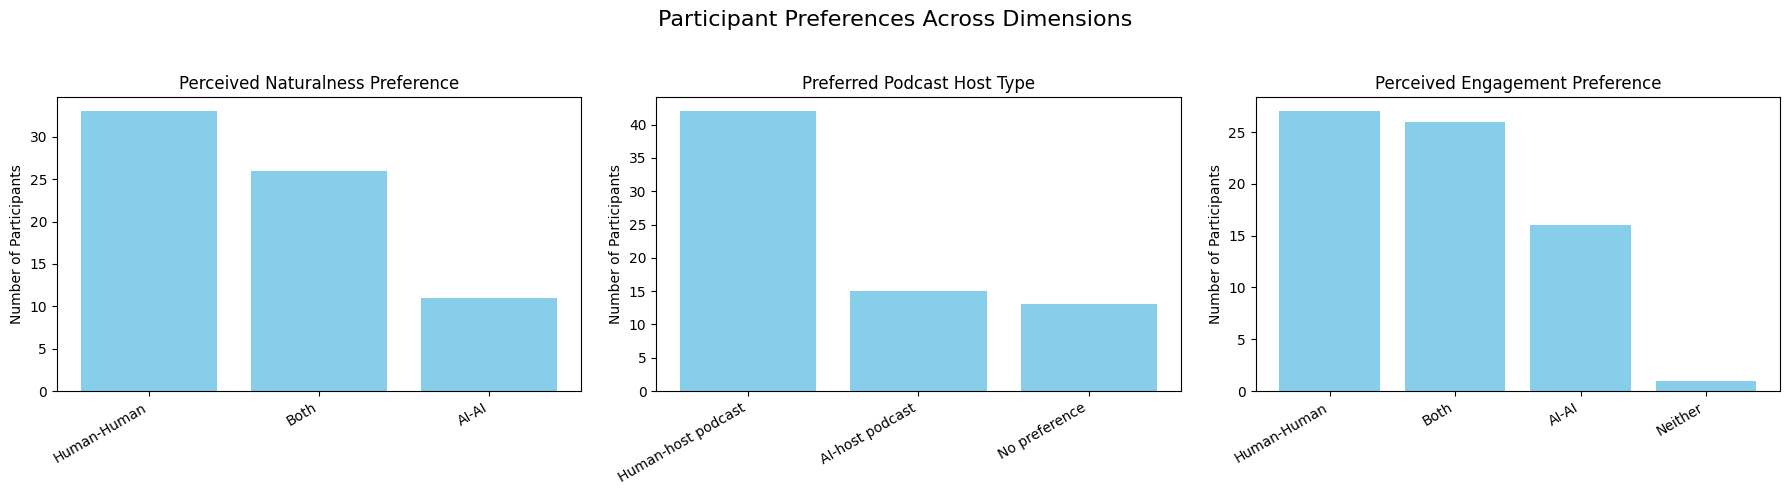

In [47]:
import matplotlib.pyplot as plt

# 设置画布
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
titles = {
    'natural_preference': 'Perceived Naturalness Preference',
    'host_preference': 'Preferred Podcast Host Type',
    'engagement_preference': 'Perceived Engagement Preference'
}

# 依次画每个柱状图
for ax, col in zip(axes, preference_cols):
    counts = df_whole[col].value_counts()
    ax.bar(counts.index, counts.values, color='skyblue')
    ax.set_title(titles[col])
    ax.set_ylabel('Number of Participants')
    ax.set_xticklabels(counts.index, rotation=30, ha='right')

plt.suptitle("Participant Preferences Across Dimensions", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Text Analysis

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# 合并两个文本字段
all_reasons = df_whole['preference_reason'].fillna('') + ' ' + df_whole['host_reason'].fillna('')

# 初始化词袋模型
vectorizer = CountVectorizer(stop_words='english', max_features=30)
X = vectorizer.fit_transform(all_reasons)

# 转换为 DataFrame 并排序词频
word_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_keywords = word_counts.sum().sort_values(ascending=False)

# 展示前 20 个关键词
top_keywords.head(20)


human            84
ai               70
engaging         30
podcasts         29
conversation     26
hosted           25
like             25
prefer           21
conversations    20
humans           17
real             14
generated        12
voice            12
listen           11
natural          11
felt             10
feel             10
relatable        10
just              9
interesting       9
dtype: int64

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wudon\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


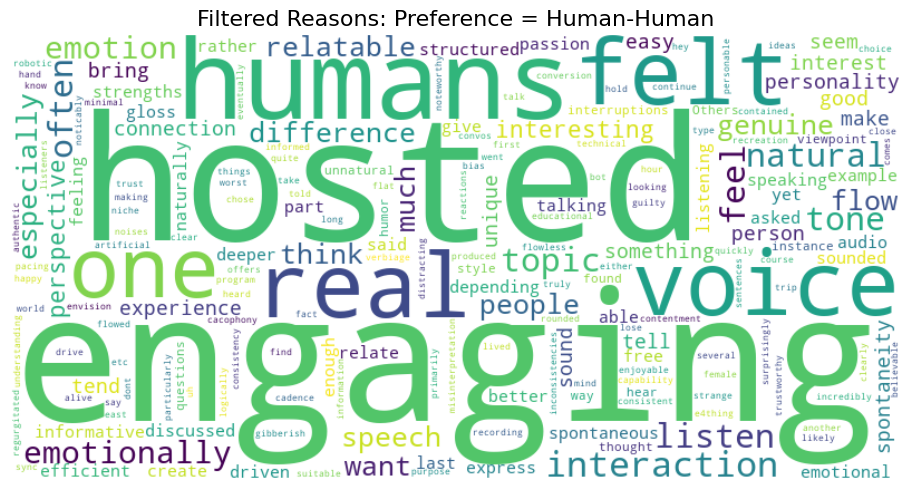

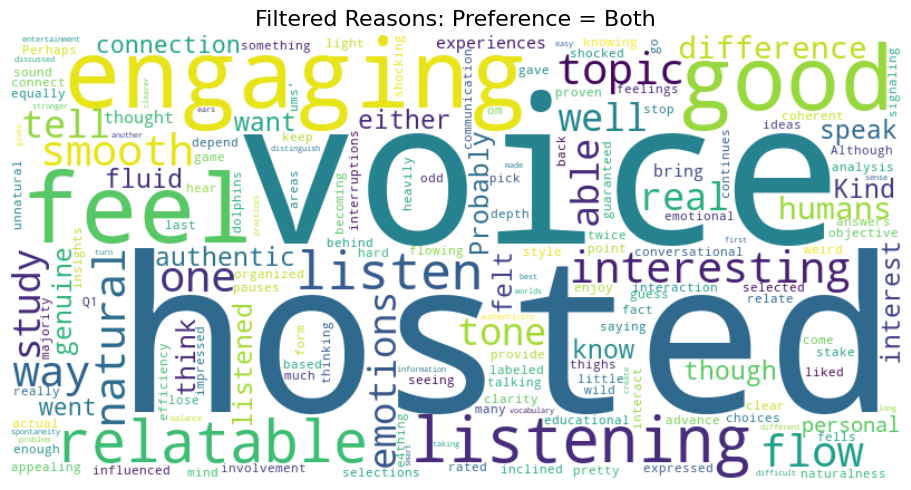

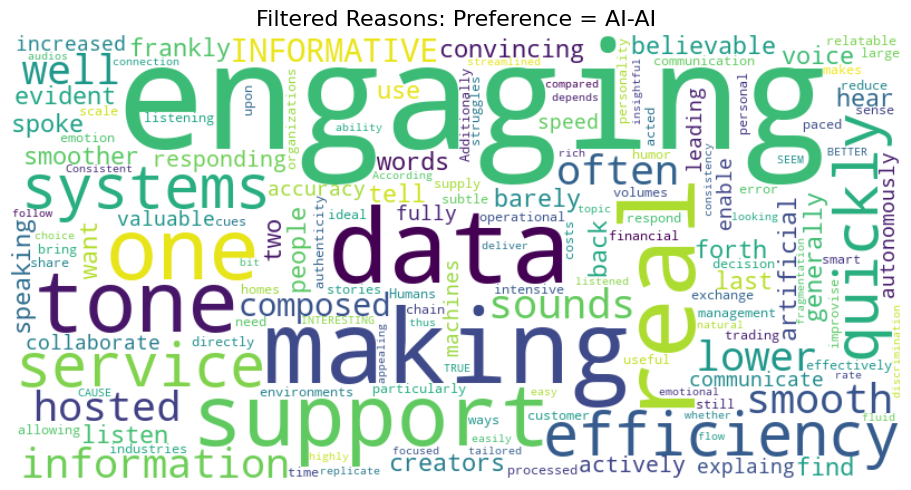

In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 准备三个子集
group_human = df_whole[df_whole['natural_preference'] == 'Human-Human']
group_both = df_whole[df_whole['natural_preference'] == 'Both']
group_ai = df_whole[df_whole['natural_preference'] == 'AI-AI']

# 合并对应的文本字段
def get_reason_text(df):
    return (df['preference_reason'].fillna('') + ' ' + df['host_reason'].fillna('')).str.cat(sep=' ')

text_human = get_reason_text(group_human)
text_both = get_reason_text(group_both)
text_ai = get_reason_text(group_ai)

# 自定义 stop words
custom_stopwords = set([
    'human', 'ai', 'podcast', 'podcasts', 'like', 'prefer', 'preferred',
    'host', 'hosts', 'hosting', 'preference', 'preferable', 'just', 'get',
    'conversation', 'seemed', 'generated', 'conversations', 'content'
])

from wordcloud import STOPWORDS
import nltk
from nltk.corpus import stopwords

# 确保已下载 NLTK 的英文停用词列表
nltk.download('stopwords')
nltk_stopwords = set(stopwords.words('english'))

# 合并默认英文 stopwords 与自定义 stopwords
full_stopwords = STOPWORDS.union(nltk_stopwords).union(custom_stopwords)

# 修改 plot_wordcloud 函数以应用自定义 stopwords
def plot_wordcloud_filtered(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=full_stopwords).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# 再次绘制过滤后的三个词云
plot_wordcloud_filtered(text_human, 'Filtered Reasons: Preference = Human-Human')
plot_wordcloud_filtered(text_both, 'Filtered Reasons: Preference = Both')
plot_wordcloud_filtered(text_ai, 'Filtered Reasons: Preference = AI-AI')
